In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numba import njit, prange
from scipy.integrate import quad

In [13]:
import numpy as np
from numba import njit

@njit
def cosmo_integrate(f, x1, x2, N, H0, Om, Ol):
    """
    Integration function, specifically for cosmology. Because numba does not support
    dinamical **kwargs, we need to pass the parameters as arguments directly.
    """
    dx = (x2 - x1) / N
    # vectorized function to calculate for an array of x2
    result = np.empty(len(x2))
    for i in range(len(x2)):
        result[i] = np.sum(f(np.linspace(x1, x2[i], N), H0=H0, Om=Om, Ol=Ol) * dx[i])

    return result

@njit
def DL(z, H0, Om, Ol):
    """
    Luminosity distance in Mpc.

    Parameters
    ----------
    z : np.ndarray
        A numpy array of redshifts.
    H0 : float
        The present day Hubble parameter in km/s/Mpc.
    Om : float
        The present day matter density parameter Omega_m,0.
    Ol : float
        The present day dark energy density parameter Omega_lambda,0.

    Returns
    -------
    np.ndarray
        A numpy array of luminosity distances in Mpc, length of output matches
        the length of the input redshifts.
    """
    def f(z, H0, Om, Ol):
        return 1 / np.sqrt(Om * (1 + z)**3 + Ol) * 299792.458 / H0
    return cosmo_integrate(f, x1=0, x2=z, N=10**6, H0=H0, Om=Om, Ol=Ol) * (1 + z)

@njit
def DA(z, H0, Om, Ol):
    """
    Angular diameter distance in Mpc.

    Parameters
    ----------
    z : np.ndarray
        A numpy array of redshifts.
    H0 : float
        The present day Hubble parameter in km/s/Mpc.
    Om : float
        The present day matter density parameter Omega_m,0.
    Ol : float
        The present day dark energy density parameter Omega_lambda,0.

    Returns
    -------
    np.ndarray
        A numpy array of angular diameter distances in Mpc, length of output matches
        the length of the input redshifts.
    """
    def f(z, H0, Om, Ol):
        return 1 / np.sqrt(Om * (1 + z)**3 + Ol) * 299792.458 / H0
    return cosmo_integrate(f, x1=0, x2=z, N=10**6, H0=H0, Om=Om, Ol=Ol) / (1 + z)
    

In [2]:
import datetime
print(datetime.datetime.now())

2024-05-20 16:30:48.666016


In [17]:
DL(np.array([0.06, 0.05]), H0=70, Om=0.3, Ol=0.7)

array([268.66126525, 222.28905465])

In [4]:
from astropy.cosmology import FlatLambdaCDM
import numpy as np
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.angular_diameter_distance(np.ones(300)).value

array([1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440294,
       1651.91440294, 1651.91440294, 1651.91440294, 1651.91440

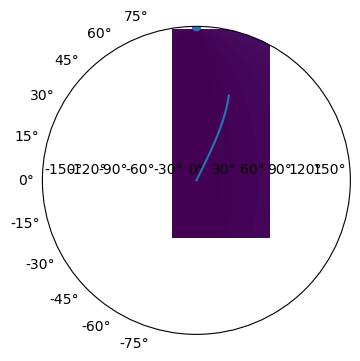

In [12]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(projection='hammer')
ax.scatter(0,np.pi/2)
ax.plot([0,np.pi/4],[0, np.pi/4])

x = np.linspace(0, 1, 90)
xx, yy = np.meshgrid(x, x)
ax.imshow(xx)
plt.show()